***SHEET 5***


CARLOS FAROUK ABDALÁ RINCÓN

TOMAS CANDEO MONTOYA

GABRIEL DAVID JIMÉNEZ MOSQUERA

In [23]:
#IMPORTS
import numpy as np
import random
import math
import pandas as pd
import matplotlib.pyplot as plt
#import requests as rq
import itertools
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from time import sleep
from sklearn.cluster import KMeans, DBSCAN
import datetime

### UTILS

In [24]:
def kMeans(D,k,eps=0.01,mu=None,max_iter=20):
 d=D.shape[1]
 if mu is None:
  mu=np.random.rand(k,d)*(np.max(D,axis=0)-np.min(D,axis=0))+np.min(D,axis=0)
 if type(mu)==list:
  mu=np.array(mu)
 s=False
 g=0
 while not s:
  C=[np.argmin([np.linalg.norm(mu[j]-x)for j in range(k)if not any(np.isnan(mu[j]))])for x in D]
  n=np.zeros(mu.shape)
  s=True
  for i in range(k):
   J=[D[j]for j in range(len(D))if C[j]==i]
   if len(J)>0:
    n[i]=np.mean(J,axis=0)
   else:
    n[i]=np.random.rand(1,d)*(np.max(D,axis=0)-np.min(D,axis=0))+np.min(D,axis=0)
   if np.linalg.norm(mu[i]-n[i])>eps:
    s=False
  mu=n
  g+=1
  if g>=max_iter:
   s=True
 return C,mu

In [25]:
def DBSCAN1(D, epsilon, minpts):
    def Density_Connected(x, k):
        for _,neighbor_index in enumerate(Ne(x, D, epsilon)):
            if id[neighbor_index] == 0 or id[neighbor_index] == -1:
                id[neighbor_index] = k
                if any((D[neighbor_index] == core_point).all() for core_point in core_points):
                    Density_Connected(D[neighbor_index], k)
    k = 0 # cluster id
    id  = np.array([-1]*len(D)) # cluster id
    core_points = []
    noise_points = []
    border_points = []
    for index, point in enumerate(D):
        neighborhood = Ne(point, D, epsilon)
        if len(neighborhood) >= minpts:
            id[index]=0
            core_points.append(point)
    index_in_list=0
    for index, point in enumerate(D):
        if id[index] == 0:
            k += 1
            id[index] = k
            Density_Connected(point, k)
        index_in_list+=1
    clusters = {i+1: {tuple(D[j]) for j in range(len(D)) if id[j] == i+1} for i in range(k)}
    noise_points = [tuple(D[j]) for j in range(len(D)) if id[j] == -1]
    border_points = {tuple(D[j]) for j in range(len(D)) if any((D[j] == core_point).all() for core_point in core_points) and any((D[j] == noise_point).all() for noise_point in noise_points)}  
    return clusters, core_points, noise_points, border_points, id

def Ne (xi, D, epsilon):
    ne = []
    for point_index, xj in enumerate(D):
        if (np.linalg.norm(xi-xj) <= epsilon):
            ne.append(point_index)
    return ne 


### EXERCISE 1

#### EXERCISE 1.1

In [26]:

def getDistances(A):  
    pairwise_distances = pdist(A, metric='euclidean')
    distance_matrix = squareform(pairwise_distances)
    return distance_matrix


#### EXERCISE 1.2

In [27]:
def getW(D, U, V):
    U_indices = np.array(U)
    V_indices = np.array(V)
    subset_D = D[U_indices[:,None], V_indices]
    acum_sum = np.sum(subset_D)
    return acum_sum


#### EXERCISE 1.3

In [28]:
def getWIn(D, C):
    C_array=np.array(C)
    equal_conditions=np.where(C_array[:,None]==C_array)
    acum_sum= np.sum(D[equal_conditions[1],equal_conditions[0]])
    return acum_sum/2

In [29]:
def getWOut(D, C):
    C_array=np.array(C)
    not_equal_conditions=np.where(C_array[:,None]!=C_array)
    acum_sum= np.sum(D[not_equal_conditions[1],not_equal_conditions[0]])
    return acum_sum/2

In [30]:
def getNIn(C):
    C_array=np.array(C)
    equal_conditions=np.where(C_array[:,None]==C_array)
    n_in=(len(equal_conditions[0])-len(C))/2
    return n_in

In [31]:
def getNOut(C):
    C_array=np.array(C)
    not_equal_conditions=np.where(C_array[:,None]!=C_array)
    n_out=(len(not_equal_conditions[0]))/2
    return n_out

In [32]:
# Test weight
import pandas as pd_test
import numpy as np_test

dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)
clusters = np.where(C_Iris_Test == 'setosa')[0]
C2 = np.where(C_Iris_Test == 'versicolor')[0]
C3 = np.where(C_Iris_Test == 'virginica')[0]
CList = [clusters, C2, C3]

print ("\nTest Weight Measures\n------------------")
expectedW = {
    (0,1): 8246,
    (0,2): 12056,
    (1,2): 4606
}
wSummary = "W: "
wFailed = False
for i in range(3):
    for j in range(i):
        p1 = (i,j)
        p2 = (j,i)
        W1 = np_test.round(getW(D_Iris_Test, CList[i], CList[j]))
        W2 = np_test.round(getW(D_Iris_Test, CList[j], CList[i]))
        if W1 != W2:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tasymmetry of W: " + str(W1) + " != " + str(W2)
            wFailed = True
        
        if W1 != expectedW[p2]:
            if not wFailed:
                wSummary += "failed"
            wSummary += "\n\tunexpected value of W: " + str(W1) + " instead of expected " + str(expectedW[p2])
            wFailed = True
if not wFailed:
    wSummary += "ok"
print(wSummary)
expectedWIn = 3518
expectedWOut = 24908
expectedNIn = 3675
expectedNOut = 7500
print("WIn:", "ok" if np_test.abs(np_test.round(getWIn(D_Iris_Test, C_Iris_Test)) - expectedWIn) < 2 else "failed")
print("WOut:", "ok" if np_test.abs(np_test.round(getWOut(D_Iris_Test, C_Iris_Test)) - expectedWOut) < 2 else "failed")
print("NIn:", "ok" if getNIn(C_Iris_Test) == 3675 else "failed")
print("NOut:", "ok" if getNOut(C_Iris_Test) == 7500 else "failed")


Test Weight Measures
------------------
W: ok
WIn: ok
WOut: ok
NIn: ok
NOut: ok


#### EXERCISE 1.4

In [80]:
def getBetaCV(A,C):
    D=getDistances(A)
    betaCV_value= (getWIn(D,C)/getNIn(C))/(getWOut(D,C)/getNOut(C))
    return betaCV_value

In [44]:
def getCIndex(A, C):
    D = getDistances(A)
    W_in = getWIn(D, C)
    N_in = getNIn(C)
    values = D[np.triu_indices(len(C), k=1)]
    values_sorted = np.sort(values)
    sum_n_values_min = np.sum(values_sorted[:int(N_in)])
    sum_n_values_max = np.sum(values_sorted[-int(N_in):])
    C_index = (W_in - sum_n_values_min) / (sum_n_values_max - sum_n_values_min)
    return C_index

In [35]:
def getNormalizedCut(A, C):
    D=getDistances(A)
    categories=np.unique(C)
    normalizedCut=0
    C_array=np.array(C)
    index_groups = [[np.where(C_array[:,None]==category)[0]] for category in categories]
    for index,cluster in enumerate(index_groups):
        value_up=0
        value_up=sum(getW(D,cluster[0],another_cluster[0])for index_another_cluster, another_cluster in enumerate(index_groups) if index!= index_another_cluster)
        value_down= getW(D,cluster[0],cluster[0])+value_up
        normalizedCut+=(value_up/value_down)
    return normalizedCut

In [85]:
def getDunn(A, C):
    D = getDistances(A)
    categories=np.unique(C)
    C_array=np.array(C)
    index_groups=[(np.where(C_array[:,None]==category))[0] for category in categories]
    min_out_list=[]
    max_in_list=[]

    for principal_index,principal_cluster in enumerate(index_groups,):
        for _,selected_point in enumerate(principal_cluster):
            for analized_index,cluster_analized in enumerate(index_groups):
                if (principal_index==analized_index):
                    max_in_list.append(max(D[selected_point,cluster_analized]))
                else:
                    min_out_list.append(min(D[selected_point,cluster_analized]))
    min_out=min(min_out_list)
    max_in=max(max_in_list)
    dunn = min_out / max_in
    return dunn

In [63]:
def getDaviesBouldin(A, C):
    categories=np.unique(C)
    C_array=np.array(C)
    A_array=np.array(A)
    daviesBouldin_values=[]
    index_groups = [A_array[np.where(C_array[:,None]==category)[0]] for category in categories]
    
    desv_groups= [np.linalg.norm(np.std(cluster,axis=0)) for cluster in index_groups]
    mean_groups= [np.mean(cluster,axis=0) for cluster in index_groups]

    for index_cluster in range(len(index_groups)):
        daviesBouldin_for_cluster=[]
        for index_another_cluster in range(len(index_groups)):
            if(index_cluster!=index_another_cluster):
                daviesBouldin_for_cluster.append(((desv_groups[index_cluster]+desv_groups[index_another_cluster])/(np.linalg.norm(mean_groups[index_cluster]-mean_groups[index_another_cluster]))))
        daviesBouldin_values.append(max(daviesBouldin_for_cluster))
    daviesBouldin=sum(daviesBouldin_values)/len(index_groups)
    return(daviesBouldin)

In [38]:
def getSilhouette(A,C):
    D=getDistances(A)
    categories=np.unique(C)
    C_array=np.array(C)
    SC_list=[]
    index_groups=[(np.where(C_array[:,None]==category))[0] for category in categories]

    for principal_index,principal_cluster in enumerate(index_groups,):
        for _,selected_point in enumerate(principal_cluster):
            Si_value=0
            difference_different_cluster=[]
            for analized_index,cluster_analized in enumerate(index_groups):
                if (principal_index==analized_index):
                    if((len(principal_cluster))!=1):
                        distance_points_same_cluster=np.sum(D[selected_point,cluster_analized])
                        mean_diference_same_cluster=distance_points_same_cluster/(len(principal_cluster)-1)
                    else:
                        mean_diference_same_cluster=0  
                else:
                    distance_points_different_cluster=np.sum(D[selected_point,cluster_analized])
                    mean_diference_different_cluster=distance_points_different_cluster/(len(principal_cluster))
                    difference_different_cluster.append(mean_diference_different_cluster)
            Si_value=(min(difference_different_cluster)-mean_diference_same_cluster)/(max([min(difference_different_cluster),mean_diference_same_cluster]))
            SC_list.append(Si_value)

    SC=(sum(SC_list)/len(SC_list))
    return(SC)


In [60]:
def getMetric(A, C, metric):
    if metric == "beta":
        return getBetaCV(A, C)
    elif metric == "cindex":
        return getCIndex(A, C)
    elif metric == "nc":
        return getNormalizedCut(A, C)
    elif metric == "dunn":
        return getDunn(A, C)
    elif metric == "db":
        return getDaviesBouldin(A, C)
    elif metric == "sil":
        return getSilhouette(A, C)
    else:
        return "metrica invalida"

In [86]:
# Test weights
import pandas as pd_test
import numpy as np_test
dfIrisTest = pd_test.read_csv("https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv")
A_Iris_Test = dfIrisTest[dfIrisTest.columns[:4]].astype(float)
C_Iris_Test = dfIrisTest[dfIrisTest.columns[4]]
D_Iris_Test = getDistances(A_Iris_Test)

# Test metrics
print ("\nTest Metrics\n------------------")
expected = {
    "beta": 0.2882861014913346,
    "cindex": 0.046803774122703735,
    "nc": 2.6150343040385264,
    "dunn": 0.05848053214719304,
    "db": 0.8445815484442534,
    "sil": 0.5032506980665507
}
for metric in expected:
    e = np.round(expected[metric], 2)
    a = getMetric(A_Iris_Test, C_Iris_Test, metric)
    a = np.round(a, 2) if not a is None else None
    print(metric + ":\t", "ok" if e == a else "failed. Expected " + str(e) + " but saw " + str(a))


Test Metrics
------------------
beta:	 ok
cindex:	 ok
nc:	 ok
dunn:	 ok
db:	 ok
sil:	 ok


### EXERCISE 2

#### EXERCISE 2.1

In [87]:
def plotMetrics(D, l, kmeans_eps, dbscan_configs,dataset_name):
    print(f"Plot Metrics - {dataset_name}")
    if(dataset_name=="Mall Customers"):
        dbscan_configs=[(x, round(y * 20,2)) for x, y in dbscan_configs]
    D = pd.DataFrame(D)
    D = D.values
    metrics = ["beta", "cindex", "nc", "dunn", "db", "sil"]
    colors=["red","green","blue","purple"]
    k_values = [2, 3, 4, 5]
    kmeans_metrics = {metric: {k: [] for k in k_values} for metric in metrics}
    dbscan_metrics = {metric: {dbscan_config: [] for dbscan_config in dbscan_configs} for metric in metrics}

    for iteration in tqdm(range(l),desc=f"Iteraciones Kmeans- {dataset_name}"):
        for k_value in k_values:
            kmeans = KMeans(n_clusters=k_value, tol=kmeans_eps)
            C = kmeans.fit_predict(D)
            for metric in metrics:
                #print(f"Estoy en {metric}")
                kmeans_metrics[metric][k_value].append(getMetric(D, C, metric))
        
    for min_pts, e in tqdm(dbscan_configs, desc=f"Configuraciones DBSCAN- {dataset_name}"):
        dbscan = DBSCAN(eps=e, min_samples=int(min_pts))
        C = dbscan.fit_predict(D)
        for metric in metrics:
            try:
                dbscan_metrics[metric].setdefault((min_pts, e), []).append(getMetric(D, C, metric))
            except Exception as e:
                print(f"Error de tipo {type(e)}: '{e}' en el cálculo de Métricas")
                dbscan_metrics[metric].setdefault((min_pts, e), []).append(0)
                pass

    
    fig_kmeans, axs_kmeans = plt.subplots(3, 2, figsize=(8, 8))
    fig_kmeans.suptitle(f"{dataset_name}")

    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        axs_kmeans[row, col].set_title(f"Metric: {metric}")
        for position, k_value in enumerate(k_values):
            axs_kmeans[row, col].boxplot(kmeans_metrics[metric][k_value], positions=[position+1])
        for index,dbscan_config in enumerate(dbscan_configs):
                axs_kmeans[row, col].axhline(y=dbscan_metrics[metric][dbscan_config][0], color=colors[index], linestyle="--", label="DBSCAN " + str(dbscan_config))

        axs_kmeans[row, col].legend(loc='upper right', fontsize=7)
        axs_kmeans[row, col].set_xticks(range(1, len(k_values) + 1))
        axs_kmeans[row, col].set_xticklabels(k_values)
        axs_kmeans[row, col].set_xlabel("Clusters")
    plt.tight_layout()
    plt.show()  

Plot Metrics - Iris


Configuraciones DBSCAN- Iris: 100%|██████████| 4/4 [00:00<00:00, 96.57it/s]


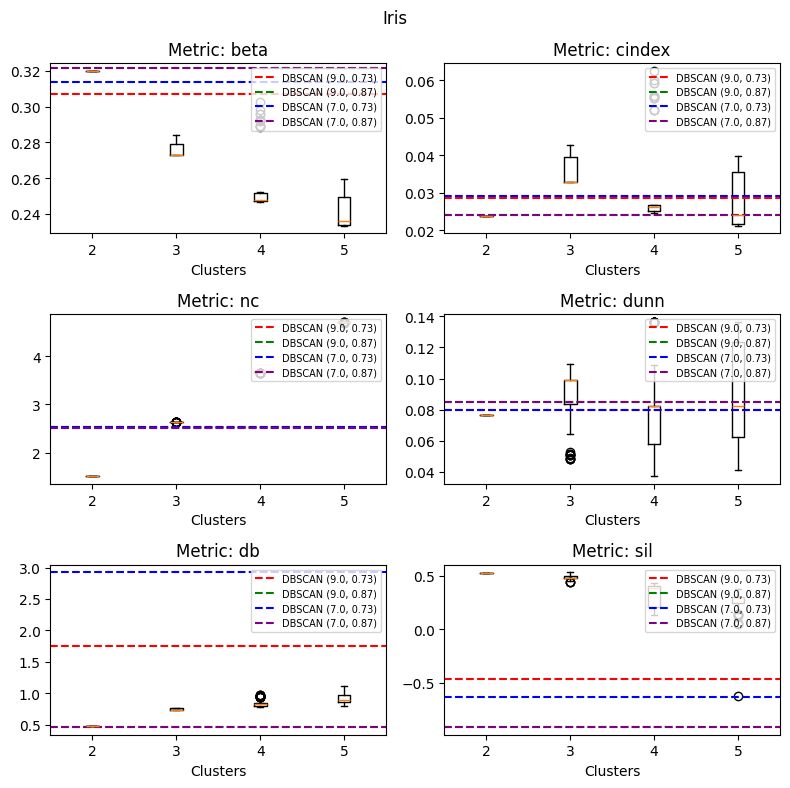

Plot Metrics - Mall Customers


Configuraciones DBSCAN- Mall Customers: 100%|██████████| 4/4 [00:00<00:00, 64.11it/s]


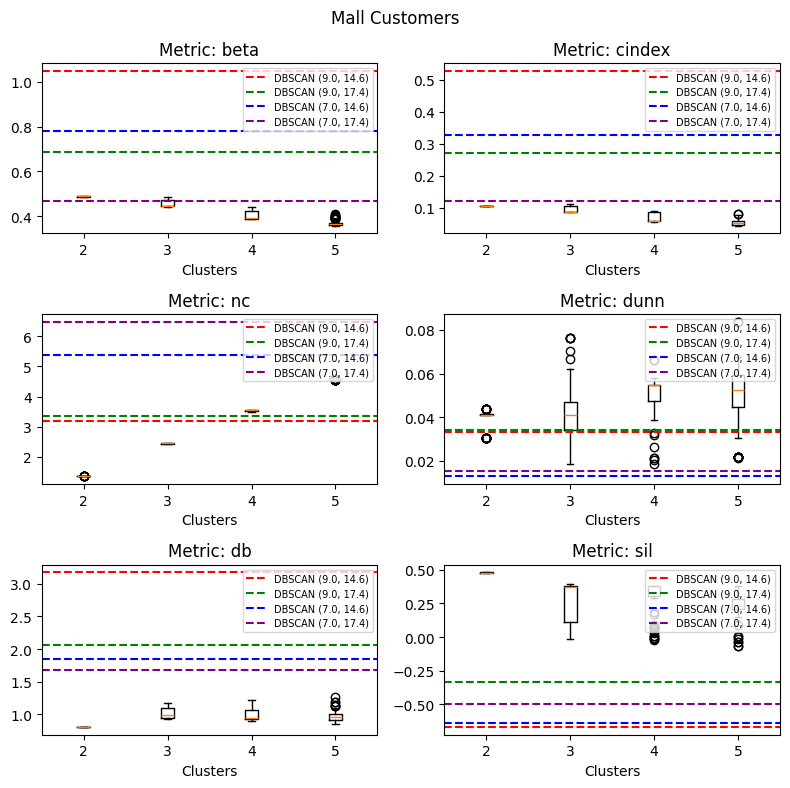

In [88]:
#IRIS DATASET: iris.csv
#MALL CUSTOMERS DATASET: Mall_Customers.csv
#DELAYED FLIGHTS DATASET: delayedflights-small.csv

minpts_values = [round(random.uniform(2,10),0) for _ in range(2)]
epsilon_values = [round(random.uniform(0.5, 0.95), 2) for _ in range(2)]
parameter_combinations = list(itertools.product(minpts_values, epsilon_values))
datasets=["iris.csv","Mall_Customers.csv","delayedflights-small.csv"]
datasets_name=["Iris","Mall Customers","Delayed Fligths"]
last_dataset=2

for index,dataset in enumerate(datasets):
    if(index+1<=last_dataset):
        frame_dowloaded = pd.read_csv(dataset)
        frame_dowloaded.drop(columns=frame_dowloaded.select_dtypes(exclude='number').columns, inplace=True)
        plotMetrics(frame_dowloaded, 100, 0.01, parameter_combinations,datasets_name[index])

Plot Metrics - Delayed Fligths


Iteraciones Kmeans- Delayed Fligths:   0%|          | 0/100 [00:00<?, ?it/s]

Configuraciones DBSCAN- Delayed Fligths: 100%|██████████| 4/4 [02:50<00:00, 42.61s/it]


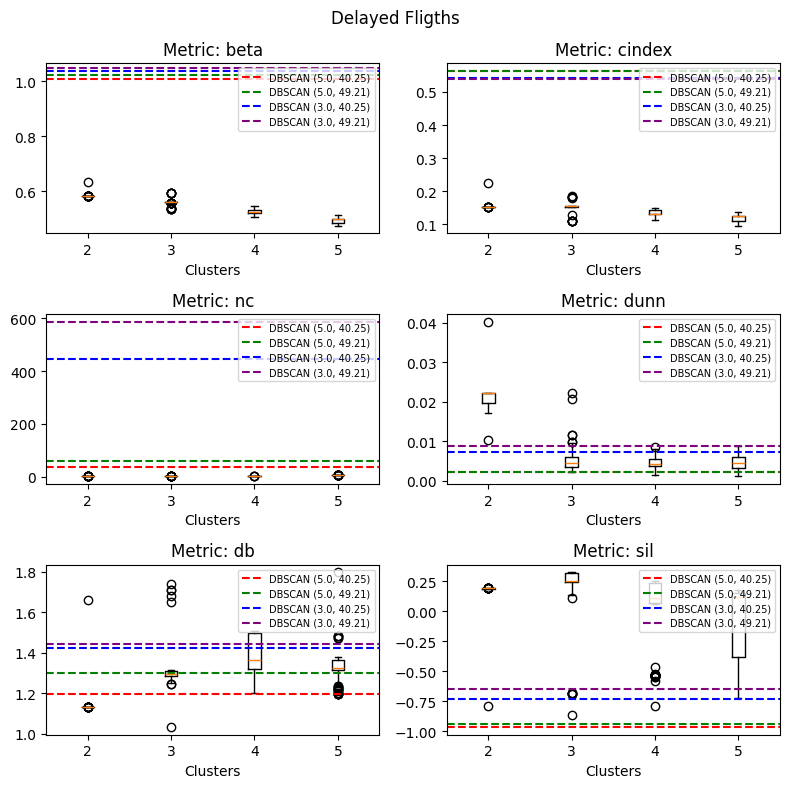

In [91]:
minpts_values = [round(random.uniform(2,5),0) for _ in range(2)]
epsilon_values = [round(random.uniform(40, 50), 2) for _ in range(2)]
parameter_combinations = list(itertools.product(minpts_values, epsilon_values))
datasets=["delayedflights-small.csv"]
datasets_name=["Delayed Fligths"]
for index,dataset in enumerate(datasets):
    frame_dowloaded = pd.read_csv(dataset)
    frame_dowloaded.drop(columns=frame_dowloaded.select_dtypes(exclude='number').columns, inplace=True)
    new_flight_frame = frame_dowloaded.drop(columns=["Year","Month","DayofMonth","DayOfWeek","FlightNum","WeatherDelay","NASDelay","SecurityDelay"])
    plotMetrics(frame_dowloaded,100, 0.01, parameter_combinations,datasets_name[index])

La grafica de las metricas para delayedflights-small no pudo ser presentada debido a que el tiempo de ejcución necesario para que complete la función es demaciado alto, se realizaron multiples pruebas desde el primer moemnto en el que el codigo funcion para los otros dos dataframes entregados, inicialmente se estimaba un tiempo de 3.8 días para la completa ejecución del codigo, a causa de esto se busco optimizar las funciones que más se demoraban y esto logro reducir el tiempo hasta unos 40 min por iteración como se ve en el output, este output lo obtubimos con imprimiendo la metrica que se esta calculando y la hora a la que se claculo para determinar cuanto tarda cada una, e hicimos el ploteo para una unica iteración, pero igualmente el tiempo total necesario para todas las iteraciones continuaba siendo de 38 horas, razón por la cual no esta presente, sin embargo el codigo funciona correctamente 